# Entanglement detection

In [39]:
## import necessary packages
import sys
import numpy as np
import matplotlib as mpl
import math
from cmath import cos, sin, exp, pi, sqrt
# import cmath

# mpl.rcParams['figure.dpi'] = 400
# mpl.rcParams["figure.figsize"] = [10, 6]
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 400
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# print(sys.version)
# print(sys.executable)
# print(np.__version__)
# print(mpl.__version__)

from qutip import *

import random
pauli_operators = [qeye(2), sigmax(),sigmay(),sigmaz()]
I, X, Y, Z = qeye(2), sigmax(), sigmay(), sigmaz()

from sklearn import svm, datasets
from sklearn.inspection import DecisionBoundaryDisplay



## Entanglement witness

### Dataset generation

##### Necessary and sufficient condition: Positive Partial Transpose (PPT) 

$$|\psi \rangle $$

In [69]:
def ppt_criterion(rho):
    # rho = ket2dm(bell_state())
    rho_out = partial_transpose(rho, [0, 1])
    # print(rho_out.eigenenergies(sort='low',eigvals=1))
    return rho_out.eigenenergies(sort='low', eigvals=1)

def generate_rand_product_state(n,m):
    print("----- generate_rand_product_state -----")
    print("number of qubits: ", n)
    print("number of samples: ", m)
    return [
        ket2dm( tensor([ rand_ket(2) for j in range(n) ]) ) for i in range(m)
    ]


def generate_rand_3_qubit_pure_product_state(d, m):
    return [
        ket2dm(tensor(rand_ket(2), rand_ket(2), rand_ket(2))) for i in range(m)
    ]


def generate_two_qubit_product_pure_state(m):
    return [ tensor([rand_ket(N=2),rand_ket(N=2)]) for i in range(m) ]

# def generate_two_qubit_entangled_pure_state(m):

def generate_two_qubit_random_state_PPT(m):
    rand_dm_2 = [rand_dm(N=4, dims=[[2, 2], [2, 2]]) for i in range(m)]
    entangled = list(filter(lambda p: ppt_criterion(p) < 0, rand_dm_2))
    # for product pure states, the smallest eigenvalue is a very very small negative one
    separable = list(filter(lambda p: ppt_criterion(p) >= 0, rand_dm_2))
    print('number of entangled state:', len(entangled))
    print('number of separable state:', len(separable))

    smallest_eigen_list_random = np.array([ ppt_criterion(state)
     for state in rand_dm_2
    ]).flatten()

    # fig, ax = plt.subplots(figsize=(6, 4))

    # # print(np.array(smallest_eigen_list_entangled).flatten())
    # # ax.hist(smallest_eigen_list_random)
    # ax.hist([e for e in smallest_eigen_list_random if e < 0])
    # ax.hist([e for e in smallest_eigen_list_random if e >= 0])
    # # ax.text(4, 0.4, r'$$')
    # ax.set_ylabel('Samples')
    # ax.set_xlabel('smallest eigenvalue of partial transpose')
    # ax.set_title('2-qubit random density matrix (test PPT criterion)')

    # plt.savefig('two_qubit_PPT_hist.png', dpi=300)

    return [entangled, separable]

# for state in generate_two_qubit_entangled_pure_state(3):
#     eigen_val = ppt_criterion(state)
#     eigen_val
# print(rand_dm(N=4,dims=[[2,2],[2,2]]) )

# generate_two_qubit_random_state_PPT(1000)
# [ppt_criterion(dm) for dm in [ket2dm(ket) for ket in generate_two_qubit_product_pure_state(100)]]
# [ppt_criterion(dm) for dm in generate_bell_like_pure_state(10)]


def generate_bell_noisy_density(m, kind):
    # p_limit = 1/3
    random_white_noise_p = [random.random() / 3 for i in range(m)]

    # density_matrix_bell00 = ket2dm( bell_state(state=k) )
    # print(density_matrix_bell00)

    # noisy_density = density_matrix_bell00* (1 - p) +  p /4 * identity([2,2])
    # print(noisy_density)
    return [
        ket2dm(bell_state(state=kind)) * (1 - p) + p / 4 * identity([2, 2])
        for p in random_white_noise_p
    ]


def generate_bell_like_pure_state(m,plot):
    # permute(order)
    theta_list = [ random.random()*2*pi for i in range(m) ]
    phi_list = [ random.random()*pi for i in range(m) ]

    a_list = [ cos(theta) for theta in theta_list ]
    b_list = [ sin(theta) * exp(phi*1j) for theta in theta_list for phi in phi_list ]
    # x = a* basis(4, 0) + b* basis(4, 3)
    # print(x.norm())
    # print(x)

    if plot == True:
        matrix_histogram_complex( ket2dm(random.choice(a_list) * tensor(basis(2, 0),basis(2, 0)) + random.choice(b_list) * tensor(basis(2, 1),basis(2, 1)) ),
        # xlabels=None, ylabels=None,
        xlabels=['00', '01', '10', '11'],
        ylabels=['00', '01', '10', '11'],
        title="a random two qubit entangled state",
        limits=None, phase_limits=None,
        colorbar=True, fig=None, ax=None, threshold=None)

    # matrix_histogram(
    # ket2dm( random.choice(a_list) * basis(4, 0) + random.choice(b_list) * basis(4, 3)) ,
    # xlabels=['00', '01', '10', '11'],
    # ylabels=['00', '01', '10', '11'],
    # #  ylabels=None,
    # title="a random pure product state in density matrix",
    # limits=None,
    # colorbar=True,
    # # fig=fig,
    # # ax=axes[1],
    # fig=None,
    # ax=None,
    # options=None)

    return [ket2dm( a* tensor(basis(2, 0),basis(2, 0)) + b* tensor(basis(2, 1),basis(2, 1)) ) for a in a_list for b in b_list ]

# bell_like_pure_state = generate_bell_like_pure_state(10, False)

# generate_rand_product_state(4,3)

----- generate_rand_product_state -----
number of qubits:  4
number of samples:  3


[Quantum object: dims = [[2, 2, 2, 2], [2, 2, 2, 2]], shape = (16, 16), type = oper, isherm = True
 Qobj data =
 [[ 0.04092067+0.j         -0.0243062 -0.03166277j  0.01662698-0.03734834j
   -0.03877479+0.009319j   -0.01845937-0.05909623j -0.03476173+0.0493853j
   -0.06143765-0.00716423j  0.03094955+0.05179342j  0.01593456+0.03552702j
    0.01802452-0.03343199j  0.03890012-0.00010807j -0.02318964-0.03003516j
    0.04411881-0.03903844j -0.05641222-0.01094917j -0.01770397-0.05612947j
   -0.03291487+0.0470386j ]
  [-0.0243062 +0.03166277j  0.03893685+0.j          0.01902249+0.03504958j
    0.01582092-0.03553771j  0.05669085+0.02081906j -0.01756447-0.05623127j
    0.04203634-0.04328255j -0.05845918-0.00681691j -0.03695425-0.00877294j
    0.01516206+0.03380469j -0.02302241+0.03016354j  0.03701426-0.00010283j
    0.00400054+0.05732555j  0.04197995-0.03714588j  0.0539466 +0.01964135j
   -0.01684569-0.05340835j]
  [ 0.01662698+0.03734834j  0.01902249-0.03504958j  0.04084378+0.j
   -0.02426053-0

### machine learning ansatz

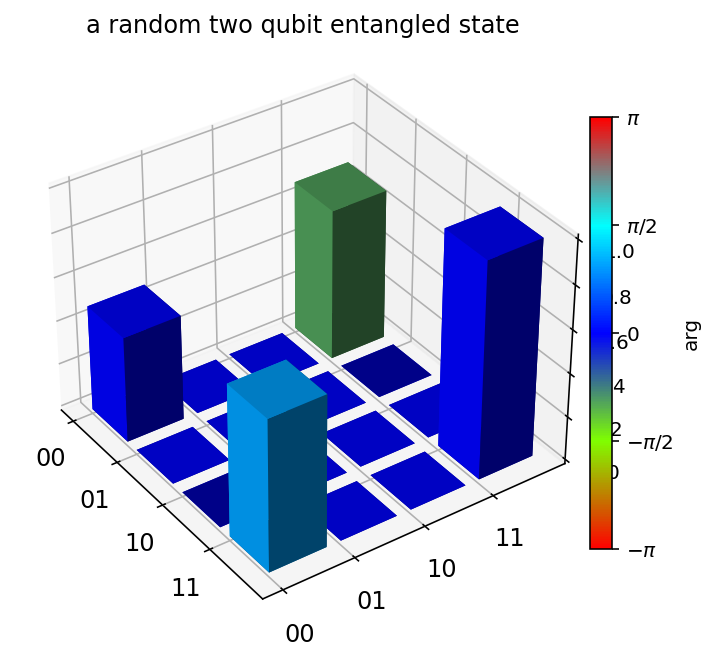

In [3]:
size_train = 100
size_test = 10


bell_like_pure_state = generate_bell_like_pure_state(size_test)
# print(len(two_qubit_entangled_pure_state))
# print(two_qubit_entangled_pure_state[0])
# print(two_qubit_entangled_pure_state[0].isket)

============== summary ===============
size of training set: 5000 ; size of testing set: 1000
kernel method: rbf
1.0
accuracy of prediction 0 (bell entangled): 1.0
accuracy of prediction 1 (separable): 1.0
number of entangled state: 662
number of separable state: 338
[0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0
 0 0 0 1 0 1 0 0 0 0 0 0 1 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1
 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 1
 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1
 0 1 0 0 0 0 0 0 1 0 1 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0
 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 

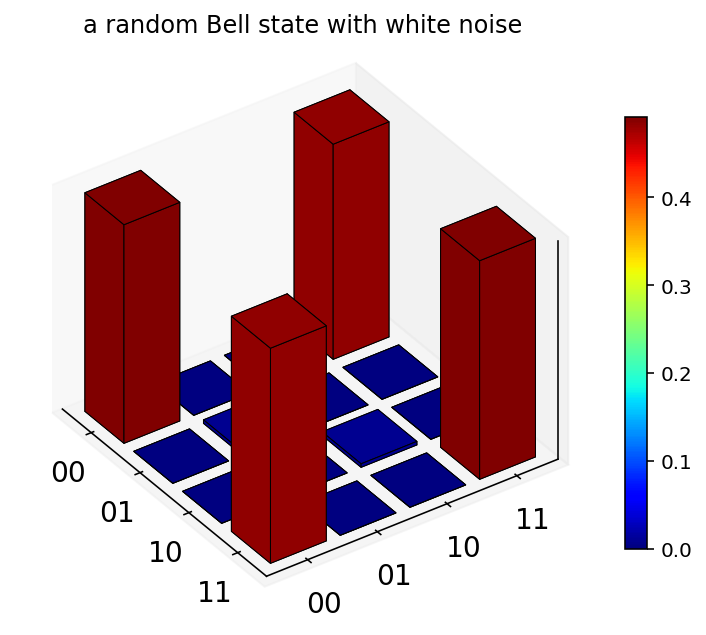

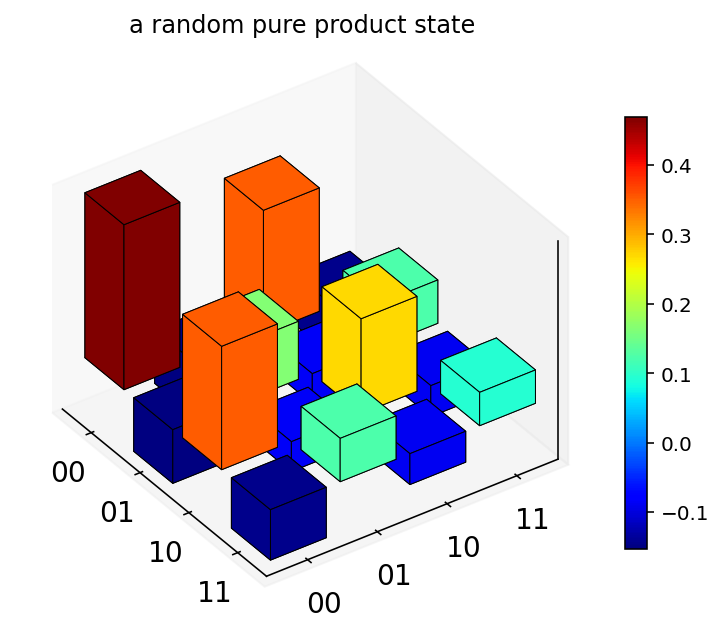

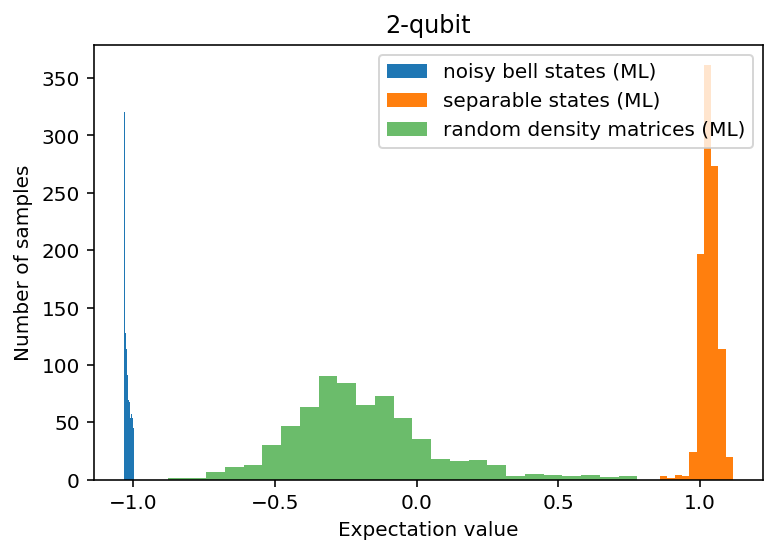

In [55]:
# rand_herm
# rand_unitary
# rand_unitary_haar
# rand_dm(N=3)

# traing with the entries of the density matrix

# number_samples = 1000
size_train = 1000

bell_kinds = ['00', '01', '10', '11']
two_pauli = [tensor([a,b]) for a in pauli_operators for b in pauli_operators ]
# print(two_pauli)


# generate_rand_pure_state_ensemble(4,5)
def assemble_training_dataset(m):

    # figure = plt.figure(figsize=(10, 6))
    # fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(10, 4))
    # fig, axes = plt.subplots(1, 2, figsize=(12,3))
    # bell_noisy_density = np.array([ generate_bell_noisy_density(m, kind) for kind in bell_kinds ]).flatten()
    # print(len(bell_noisy_density))
    # print(bell_noisy_density[3])
    bell00_noisy_density = generate_bell_noisy_density(m,'00')
    # print(bell00_noisy_density[0])
    bell01_noisy_density = generate_bell_noisy_density(m,'01')
    bell10_noisy_density = generate_bell_noisy_density(m,'10')
    bell11_noisy_density = generate_bell_noisy_density(m,'11')

    # generate_two_qubit_product_pure_state(m)
    # feature_bell = [ expect(two_pauli, state) for state in flatten(bell_noisy_density) ]
    # print(feature_bell)
    feature_bell00 = [
        expect(two_pauli, state) for state in bell00_noisy_density
    ]
    feature_bell01 = [
        expect(two_pauli, state) for state in bell01_noisy_density
    ]
    feature_bell10 = [
        expect(two_pauli, state) for state in bell10_noisy_density
    ]
    feature_bell11 = [
        expect(two_pauli, state) for state in bell11_noisy_density
    ]

    # ax = plt.subplot(1,2,1)
    # visualize a random noisy Bell state in density matrix
    matrix_histogram(
        random.choice(bell00_noisy_density),
        xlabels=['00', '01', '10', '11'],
        ylabels=['00', '01', '10', '11'],
        #  ylabels=None,
        title="a random Bell state with white noise",
        limits=None,
        colorbar=True,
        fig=None,
        ax=None,
        #  fig=fig,
        #  ax=axes[0],
        options=None)

    separable_pure_state = generate_two_qubit_product_pure_state(m)
    feature_separable = [
     expect(two_pauli, state)
     for state in separable_pure_state
    ]
    # visualize a random pure product state in density matrix
    matrix_histogram(
        ket2dm(random.choice(separable_pure_state)),
        xlabels=['00', '01', '10', '11'],
        ylabels=['00', '01', '10', '11'],
        #  ylabels=None,
        title="a random pure product state",
        limits=None,
        colorbar=True,
        # fig=fig,
        # ax=axes[1],
        fig=None,
        ax=None,
        options=None)

    # combine 0 data with 1 data
    feature = feature_bell00 + feature_bell01 + feature_bell10 + feature_bell11 + feature_separable

    label = [0 for i in range(m)] + [0 for i in range(m)]+ [0 for i in range(m)]+ [0 for i in range(m)] + [1 for i in range(m)]
    return (feature, label)

# def my_predict(x, ax):

def my_svm(x, y, size_train, size_test, kernel):
    ################# SVM training ####################
    print("============== summary ===============")
    print("size of training set:", len(x), "; size of testing set:", size_test)
    # print("size of testing set:", size_test)

    # we create an instance of SVM and fit out data.
    if kernel == 'linear':
        # linear kernel
        print("kernel method: linear kernel")
        clf = svm.SVC(kernel='linear')
        # clf = svm.SVC(kernel=my_kernel)
        # # clf.get_params()
        clf.fit(X, Y)
        print(clf.score)
        print(clf.coef0)
        print(clf.coef_)
        print(clf.intercept_)
    else:
        # kernel
        print("kernel method: rbf")
        clf = svm.SVC()
        clf.fit(X, Y)
        print(clf.score(X, Y))
        # print(clf.score)

    fig, ax = plt.subplots(figsize=(6, 4))

    ################# test/prediction ####################
    test_0 = generate_bell_noisy_density(int(size_test/4),'00') + generate_bell_noisy_density(int(size_test/4),'01') + generate_bell_noisy_density(int(size_test/4),'10') + generate_bell_noisy_density(int(size_test/4),'11')
    prediction_0 = clf.predict([expect(two_pauli, state) for state in test_0 ])
    decision_0 = clf.decision_function([ expect(two_pauli, state) for state in test_0 ])
    print("accuracy of prediction 0 (bell entangled):", sum((1-prediction_0))/len(prediction_0))
    # print(prediction)
    ax.hist(decision_0)

    test_1 = generate_two_qubit_product_pure_state(size_test)
    # test_1 = generate_two_qubit_random_pure_state_PPT(size_test)[1]
    feature_1 = [ expect(two_pauli, state) for state in test_1 ]
    prediction_1 = clf.predict(feature_1)
    print("accuracy of prediction 1 (separable):", sum(prediction_1)/len(prediction_1))
    decision_1 = clf.decision_function(feature_1)
    ax.hist(decision_1)

    # test_2 = generate_bell_like_pure_state(10,False)
    test_2 = generate_two_qubit_random_state_PPT(size_test)[0]
    feature_2 = [ expect(two_pauli, state) for state in test_2 ]
    prediction_2 = clf.predict(feature_2)
    print(prediction_2)
    decision_2 = clf.decision_function(feature_2)
    ax.hist(decision_2, alpha=0.7, bins=25)
    print("accuracy of prediction (other entangled):", sum(prediction_2)/len(prediction_2))

    # ax.hist([expect(state, bell_inequality) for state in test_0 ])
    # ax.hist([expect(state, bell_inequality) for state in [ ket2dm(ket) for ket in test_1 ] ])
    # ax.hist([expect(state, bell_inequality) for state in test_2 ])

    print("============== end ===============")
    ax.set_ylabel('Number of samples')
    ax.set_xlabel('Expectation value')
    ax.set_title('2-qubit')
    ax.legend(('noisy bell states (ML)', 'separable states (ML)',
           'random density matrices (ML)', 'bell inequality'),
          loc='upper right')
    plt.savefig('two_qubit_hist.png', dpi=300)


(X, Y) = assemble_training_dataset(size_train)
my_svm(X, Y, 1000, 1000, 'rbf')
# my_svm(X, Y, 1000, 100, 'linear')

number of entangled state: 6
number of separable state: 4
[array([ 1.        , -0.17923605,  0.0589238 ,  0.20698304, -0.09774684,
       -0.02552989, -0.05353651,  0.5401004 ,  0.39872061, -0.14907447,
        0.23371939,  0.1894432 ,  0.04557272,  0.2895322 ,  0.03624518,
       -0.18642212]), array([ 1.        , -0.27188507, -0.54884878,  0.24995544, -0.25274887,
       -0.19476659,  0.24193446, -0.20534872,  0.00479267, -0.09647647,
       -0.14355671,  0.18498614,  0.05441497, -0.06066872, -0.33616752,
       -0.54524947]), array([ 1.        ,  0.22481066, -0.1034418 , -0.44786644, -0.10407508,
       -0.20705649,  0.49695974,  0.07345519, -0.12050952,  0.00462816,
        0.06808532, -0.0709427 ,  0.18607112,  0.41440933, -0.37222065,
       -0.01961989]), array([ 1.        ,  0.63913889, -0.30380413,  0.03026374,  0.11440237,
        0.20127084,  0.30295569,  0.01698168,  0.24153406, -0.00238378,
       -0.1520845 ,  0.27749268, -0.58399832, -0.72007309,  0.14015527,
       -0.1

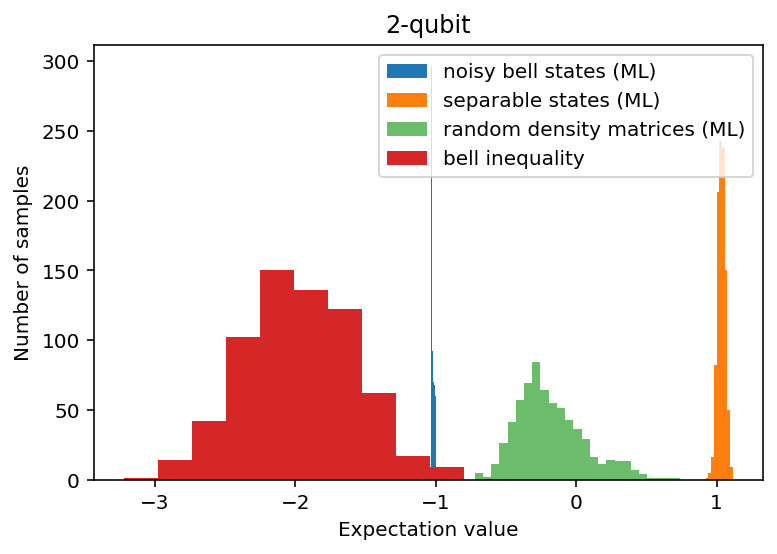

In [49]:
two_qubit_random_pure_state = generate_two_qubit_random_state_PPT(10)
entangled_sample = two_qubit_random_pure_state[0]
feature_entangled = [ expect(two_pauli, state) for state in entangled_sample ]
# print(len(entangled_sample))
print(feature_entangled)
separable_sample = two_qubit_random_pure_state[1]
feature_separable = [expect(two_pauli, state) for state in separable_sample]
# print(len(separable_sample))
labels = [0 for i in range(len(entangled_sample))]+ [1 for i in range(len(separable_sample))]

my_svm(feature_entangled + feature_separable, labels, 1000, 1000, 'rbf')


### Bell, CHSH inequalities as entanglement witness

the Bell inequality
$$ \langle a_0b_0, a_0b_0', a_0'b_0, a_0'b_0' \rangle$$
with $a_0=\sigma_x$, $a_0'=\sigma_x$, $b_0=(\sigma_x-\sigma_z)/\sqrt{2}$, and $b_0'=(\sigma_x+\sigma_z)/\sqrt{2}$

the CHSH inequality
$$ \langle \rangle$$


In [51]:
a_0 = sigmaz()
a_1 = sigmax()
b_0 = (sigmax() - sigmaz() )/sqrt(2)
b_1 = (sigmax() + sigmaz())/sqrt(2)
bell_ansatz = [ tensor(a_0,a_1), tensor(a_1,b_0), tensor(a_1,b_1), -tensor(a_0,b_1) ]
bell_inequality = tensor(a_0,a_1) + tensor(a_1,b_0) + tensor(a_1,b_1) - tensor(a_0,b_1) 


In [ ]:
# expect(oper, state)
variance(oper, state)
# purity()

entropy_relative(rho, sigma, base=2.718281828459045, sparse=False, tol=1e-12)
entropy_vn(rho, base=2.718281828459045, sparse=False)
tracedist(A, B, sparse=False, tol=0)

measure(state, ops, targets=None)
measure_observable(state, op, targets=None)

# covariance_matrix(basis, rho, symmetrized=True)
# logarithmic_negativity(V, g=1.4142135623730951)

#### Two-qubit case

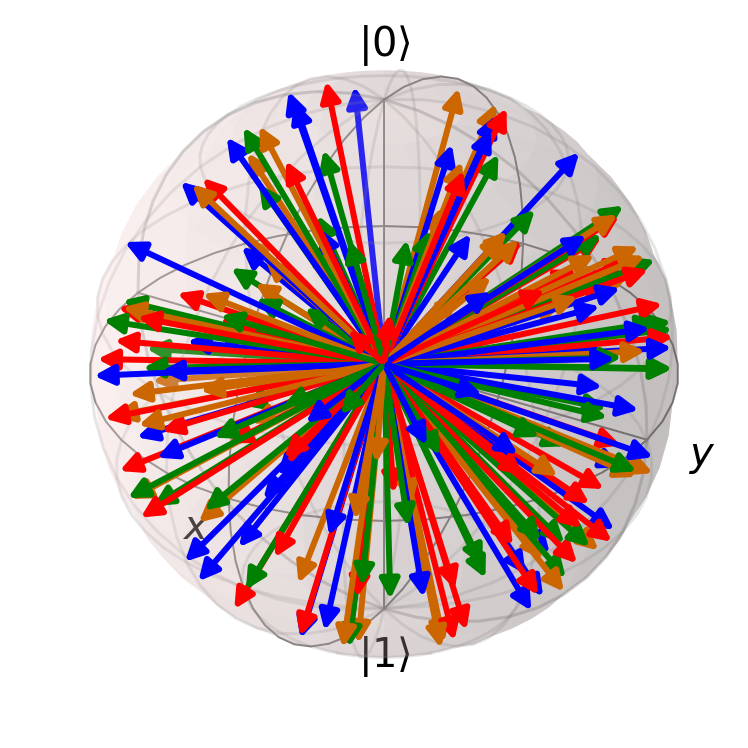

In [152]:
# bell state

b = Bloch()
# pnt = [1/np.sqrt(3), 1/np.sqrt(3), 1/np.sqrt(3)]
# b.add_points(pnt)
b.add_states([rand_ket(2) for i in range(200)])
b.render()
b.show()
# bell_state(state='00')

(array([1000.]),
 array([-5.06214077e-16,  5.44443795e-17]),
 <BarContainer object of 1 artists>)

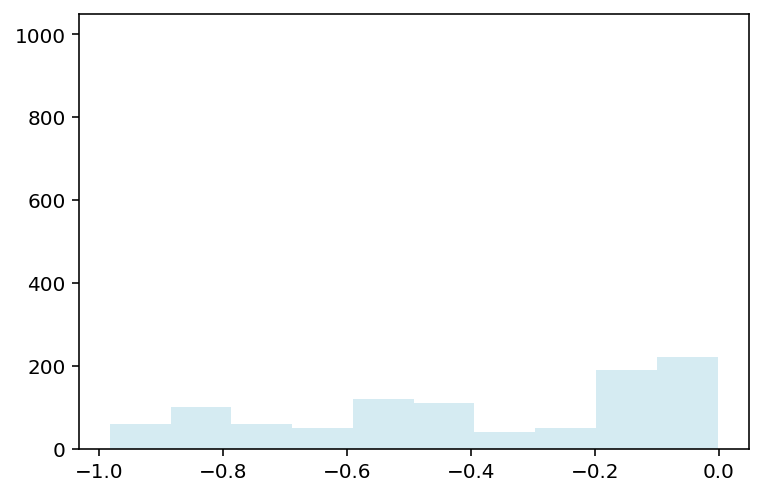

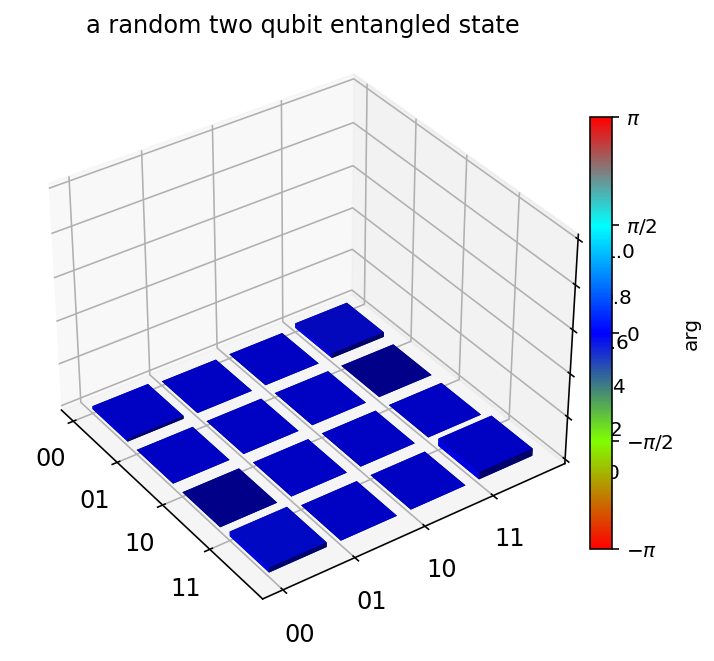

In [101]:
# dag(A)
# ptrace()
# flatten(l)
# partial_transpose(rho, mask, method='dense')

def generate_rand_mixed_state_ensemble(d, m):
    return [rand_dm(N=d) for i in range(m)]

def generate_rand_entangled_ensemble(d, m):
    return [rand_dm(N=d) for i in range(m)]

# for state in generate_two_qubit_entangled_pure_state(3):
#     eigen_val = ppt_criterion(state)
#     eigen_val

fig, ax = plt.subplots(figsize=(6, 4))

smallest_eigen_list_entangled = [
    ppt_criterion(state) for state in generate_two_qubit_entangled_pure_state(10)
]
# print(np.array(smallest_eigen_list_entangled).flatten())
ax.hist(np.array(smallest_eigen_list_entangled).flatten(), color='lightblue', alpha=0.5)

smallest_eigen_list_product = [
    ppt_criterion(ket2dm(state)) for state in generate_two_qubit_product_pure_state(1000)
]
# ax.plot(np.array(smallest_eigen_list_product).flatten())
ax.hist(np.array(smallest_eigen_list_product).flatten(), bins=1, color='salmon', alpha=0.5)

# for state in generate_two_qubit_product_pure_state(27):
#     # print(ket2dm(state))
#     ppt_criterion(ket2dm(state))


# matrix_histogram(M, xlabels=None, ylabels=None, title=None, limits=None, colorbar=True, fig=None, ax=None)


##### Two-qutrit

##### Two-qudit


In [345]:
# qutrit_basis()
x = basis(3, 2)
M = ket2dm(x)
print(M)


#### Three-qubit case
fully separable

biseparable

GME

1.0


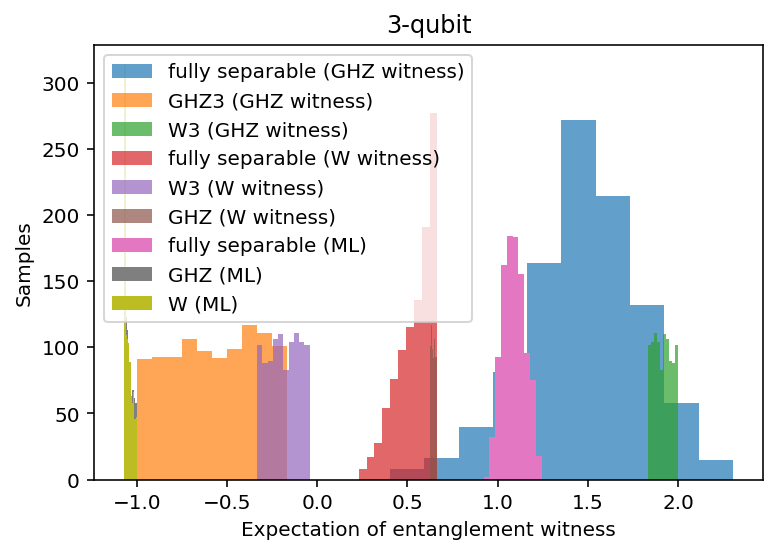

In [61]:
size_train = 1000
size_test = 1000

# rand_ket
three_pauli = [tensor([a,b,c]) for a in pauli_operators for b in pauli_operators for c in pauli_operators]

# GHZ
# random_white_noise_p = [random.random()/3 for i in range(size_train)]
# ghz_3_density
def generate_noisy_ghz(d,m):
    return [ ket2dm(ghz_state(N=d)) * (1 - p_noise) +  p_noise /(2**3) * qeye([2, 2, 2]) for p_noise in [random.random()/3 for i in range(m)] ]

def generate_noisy_w(d,m):
    return [ ket2dm(w_state(N=d)) * (1 - p_noise) +  p_noise /(2**3) * qeye([2, 2, 2]) for p_noise in [random.random()/3 for i in range(m)] ]

ghz_3_density = [ ket2dm(ghz_state(N=3)) * (1 - p) +  p /(2**3) * qeye([2, 2, 2]) for p in [random.random()/3 for i in range(size_train)] ]
# W
w_3_density = [ ket2dm(w_state(N=3)) * (1 - p_noise) +  p_noise / (2**3) * qeye([2, 2, 2]) for p_noise in [random.random()/3 for i in range(size_train)] ]

fig, ax = plt.subplots(figsize=(6, 4))


# rigorous entanglement witness
witness_ghz_3 =  3/2 * qeye([2, 2, 2]) - tensor([sigmax(), sigmax(), sigmax()]) - 1/2 * (tensor([sigmaz(), sigmaz(), qeye([2])]) + tensor([qeye([2]), sigmaz(), sigmaz()]) + tensor([sigmaz(), qeye([2]), sigmaz()]))

witness_w_3_project = 2/3 * qeye([2, 2, 2]) - ket2dm(w_state(N=3))

expect_fully_separable_3 = [
    expect(witness_ghz_3, state) for state in generate_rand_3_qubit_pure_product_state(3,size_train)
]
ax.hist(expect_fully_separable_3, alpha=0.7)
# ax.plot(expect_fully_separable_3)

expect_witness_ghz_3 = [
 expect(witness_ghz_3, state) for state in ghz_3_density
]
ax.hist(expect_witness_ghz_3, alpha=0.7)
# ax.plot(expect_witness_ghz_3)

# witness_ghz_3_project = 1/2 * qeye([2, 2, 2]) - ket2dm(ghz_state(N=3))
# # print(witness_ghz_3_project)
# expect_witness_ghz_3_project = [
#  expect(witness_ghz_3_project, state) for state in ghz_3_density
# ]
# # print(expect_witness_ghz_3_project)
# ax.hist(expect_witness_ghz_3_project, alpha=0.7)
# # ax.plot(expect_witness_ghz_3_project)

# expect_witness_w_3_project = [
#  expect(witness_ghz_3_project, state) for state in w_3_density
# ]
# ax.hist(expect_witness_w_3_project, alpha=0.7, bins=10)

expect_ghz_witness_w_3 = [ expect(witness_ghz_3, state) for state in w_3_density ]
ax.hist(expect_ghz_witness_w_3, alpha=0.7, bins=10)

expect_fully_separable_3_w = [
    expect(witness_w_3_project, state) for state in generate_rand_3_qubit_pure_product_state(3,size_train)
]
ax.hist(expect_fully_separable_3_w, alpha=0.7)

expect_w_witness_w_3 = [
    expect(witness_w_3_project, state) for state in w_3_density
]
ax.hist(expect_w_witness_w_3, alpha=0.7, bins=10)

expect_w_witness_ghz_3 = [
    expect(witness_w_3_project, state) for state in ghz_3_density
]
ax.hist(expect_w_witness_ghz_3, alpha=0.7, bins=10)

feature_ghz_3 = [expect(three_pauli, state) for state in ghz_3_density]
feature_w_3 = [expect(three_pauli, state) for state in w_3_density]
feature_product_3 = [
    expect(three_pauli, state)
    for state in generate_rand_3_qubit_pure_product_state(3, 2 * size_train)
]

X = feature_ghz_3 + feature_w_3 + feature_product_3
Y = [0 for i in range(size_train)] + [0 for i in range(size_train)
                                      ] + [1 for i in range(2 * size_train)]
clf = svm.SVC()
clf.fit(X, Y)
print(clf.score(X, Y))

test_three_1 = generate_rand_3_qubit_pure_product_state(3, size_test)
# test_1 = generate_two_qubit_random_pure_state_PPT(size_test)[1]
feature_three_1 = [expect(three_pauli, state) for state in test_three_1]
prediction_three_1 = clf.predict(feature_three_1)
# print(prediction_three_1)
decision_three_1 = clf.decision_function(feature_three_1)
ax.hist(decision_three_1)

test_three_ghz = generate_noisy_ghz(3,size_test)
# test_1 = generate_two_qubit_random_pure_state_PPT(size_test)[1]
feature_three_ghz = [expect(three_pauli, state) for state in test_three_ghz]
prediction_three_ghz = clf.predict(feature_three_ghz)
# print(prediction_three_ghz)
decision_three_ghz = clf.decision_function(feature_three_ghz)
ax.hist(decision_three_ghz)

test_three_w = generate_noisy_w(3,size_test)
# test_1 = generate_two_qubit_random_pure_state_PPT(size_test)[1]
feature_three_w = [expect(three_pauli, state) for state in test_three_w]
prediction_three_w = clf.predict(feature_three_w)
# print(prediction_three_w)
decision_three_w = clf.decision_function(feature_three_w)
ax.hist(decision_three_w)

# ax.text(4, 0.4, r'$$')
ax.set_ylabel('Samples')
# ax.set_ylabel(r'$ \tr (W \rho ) $')
ax.set_xlabel('Expectation of entanglement witness')
ax.set_title('3-qubit')
ax.legend(('fully separable (GHZ witness)', 'GHZ3 (GHZ witness)', 
           'W3 (GHZ witness)', 'fully separable (W witness)','W3 (W witness)', 'GHZ (W witness)', 'fully separable (ML)', 'GHZ (ML)', 'W (ML)'),
          loc='upper left')
# ax.legend(('fully separable (GHZ witness)', 'GHZ3 (GHZ witness)',
#            'GHZ3 (projection GHZ witness)', 'W3 (projection GHZ witness)',
#            'W3 (GHZ witness)', 'stabilizer', 'ML ansatz', 'bell inequality'),
#           loc='upper left')
# fig.show()
plt.savefig('three_qubit_hist.png', dpi=300)

# ansatz
three_pauli = [tensor([a,b,c]) for a in pauli_operators for b in pauli_operators for c in pauli_operators]


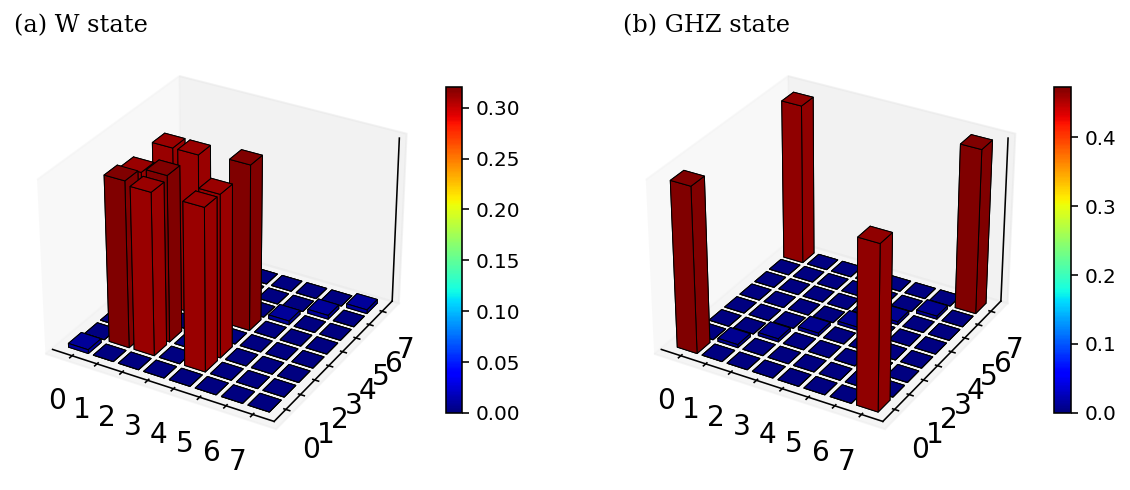

In [3]:
size_train = 10
# W
w_3_density = [ ket2dm(w_state(N=3)) * (1 - p_noise) +  p_noise / (2**3) * qeye([2, 2, 2]) for p_noise in [random.random()/3 for i in range(size_train)] ]

ghz_3_density = [
    ket2dm(ghz_state(N=3)) * (1 - p_noisep) + p_noisep /
    (2**3) * qeye([2, 2, 2])
    for p_noisep in [random.random() / 3 for i in range(size_train)]
]

# visualization
# figure = plt.figure(figsize=(10, 6))
# fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(10, 4))
# fig, ax = plt.subplots(figsize=(6, 4))
# fig, axes = plt.subplots(1, 2, figsize=(12,3))
# =============
# First subplot
# =============
# fig = plt.figure(figsize=plt.figaspect(0.5))
fig = plt.figure(figsize=(10, 4))
# set up the axes for the first plot
ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.set_title('(a) W state', fontfamily='serif', loc='left', fontsize='large')
matrix_histogram(
    random.choice(w_3_density),
    # xlabels=['000', '001', '010', '011', '100', '101', '110', '111'],
    # ylabels=['00', '01', '10', '11'],
    #  ylabels=None,
    # title="a random pure product state in density matrix",
    limits=None,
    # colorbar=False,
    fig=fig,
    ax=ax,
    # fig=None,
    # ax=None,
    options=None)

# ==============
# Second subplot
# ==============
# set up the axes for the second plot
ax = fig.add_subplot(1, 2, 2, projection='3d')
ax.set_title('(b) GHZ state', fontfamily='serif', loc='left', fontsize='large')
matrix_histogram(
    random.choice(ghz_3_density),
    # xlabels=['000', '001', '010', '011', '100', '101', '110', '111'],
    # ylabels=['00', '01', '10', '11'],
    #  ylabels=None,
    # title="a random pure product state in density matrix",
    limits=None,
    # colorbar=False,
    fig=fig,
    ax=ax,
    # fig=None,
    # ax=None,
    options=None)
# plt.savefig('three_qubit_noisy_entangle_w_ghz.png', dpi=300)

# rigorous witness

# Bell inequality

# machine learning ansatz

# w_ansatz = tensor([sigmax(), sigmax(), sigmaz()])
# print(w_ansatz)

# W style


(<Figure size 432x432 with 1 Axes>,
 <AxesSubplot:xlabel='last particles', ylabel='first particles'>)

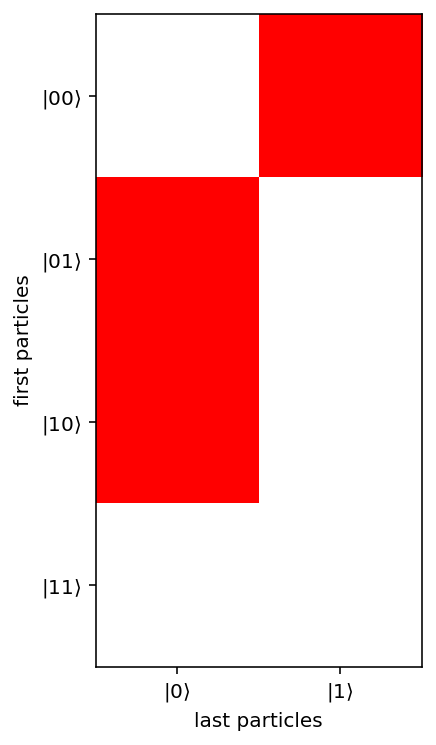

In [35]:

def generate_rand_ghz_ensemble(d,m):
    return [rand_dm(N=d) for i in range(m)]

# GHZ
ghz = ghz_state(N=3)

# W
w = w_state(N=3)
# bell_state(state='00')
# singlet_state()

# Schmidt decomposition
plot_schmidt(w, splitting=2, labels_iteration=(3, 2), theme='light', fig=None, ax=None, figsize=(6, 6))

##### mixed state

Werner state

In [377]:
# plot_expectation_values(results, ylabels=[], title=None, show_legend=False, fig=None, axes=None, figsize=(8, 4))

# plot_wigner_sphere(fig, ax, wigner, reflections)

#### Four-qubit case

graph state 

cluster state

## Versions of software package/module 

In [37]:
# about()
# from qutip.ipynbtools import version_table
# version_table()
# qutip.cite()

In [52]:
# conda list

In [333]:
import sklearn
print(sklearn.__version__)

1.1.2


In [29]:
# https://vprusso.github.io/toqito/
from toqito.nonlocal_games.xor_game import XORGame

# The probability matrix.
prob_mat = np.array([[1/4, 1/4], [1/4, 1/4]])

# The predicate matrix.
pred_mat = np.array([[0, 0], [0, 1]])

# Define CHSH game from matrices.
chsh = XORGame(prob_mat, pred_mat)
chsh.classical_value()
chsh.quantum_value()

0.8535533908447781